C:\Users\rshas\AppData\Local\Temp\ipykernel_17372\2684900947.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_pred[i] = X_query[i] @ theta


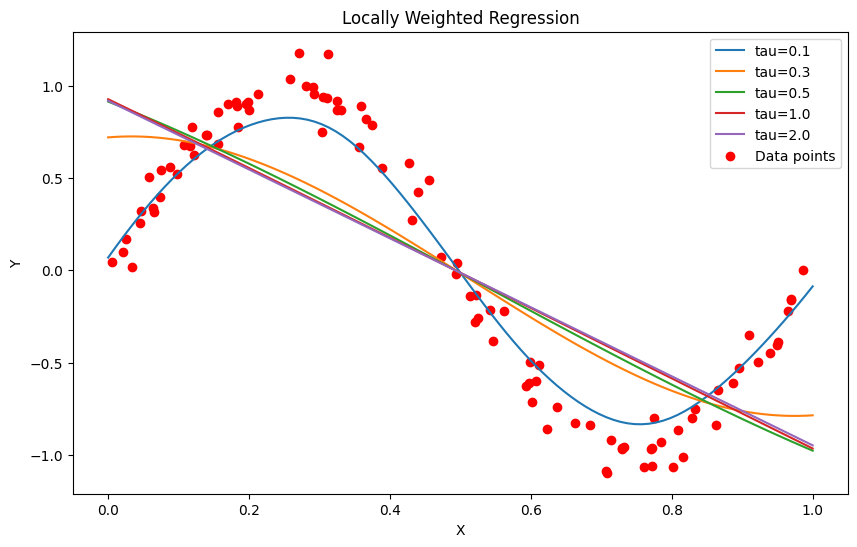

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(X_train, Y_train, X_query, tau=0.1):
    m, n = X_train.shape
    Y_train = Y_train.reshape(-1, 1)
    X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)
    X_query = np.concatenate([np.ones((X_query.shape[0], 1)), X_query], axis=1)
    Y_pred = np.zeros(X_query.shape[0])
    for i in range(X_query.shape[0]):
        weights = np.exp(-np.sum((X_train - X_query[i])**2, axis=1) / (2 * tau**2))
        W = np.diag(weights)
        theta = np.linalg.inv(X_train.T @ W @ X_train) @ (X_train.T @ W @ Y_train)
        Y_pred[i] = X_query[i] @ theta
    return Y_pred

np.random.seed(42)
X = np.sort(np.random.rand(100, 1), axis=0)
Y = np.sin(2 * np.pi * X) + 0.1 * np.random.randn(100, 1)
X_query = np.linspace(0, 1, 100).reshape(-1, 1)
tau_values = [0.1, 0.3, 0.5, 1.0, 2.0]

plt.figure(figsize=(10, 6))
for tau in tau_values:
    Y_pred = locally_weighted_regression(X, Y, X_query, tau)
    plt.plot(X_query, Y_pred, label=f'tau={tau}')
plt.scatter(X, Y, color='red', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()